# 取引履歴のデータ分析

In [1]:
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
matplotlib.use("TkAgg")

In [3]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [4]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [5]:
from src.utils.trade_analysis import TradeAnalysis

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [6]:
ta = TradeAnalysis(timestamp)

In [7]:
ex1_trades = ta.get_coincheck_trades_df()
ex2_trades = ta.get_liquid_trades_df()

In [8]:
len(ex1_trades), len(ex2_trades)

(204, 204)

## トレード結果

In [9]:
ta.display()

トレード情報
+---------------------+---------------------+
|          レコード数 |               72664 |
+---------------------+---------------------+
|            取引回数 |                 204 |
+---------------------+---------------------+
|            開始日時 | 2020-04-03 09:45:17 |
+---------------------+---------------------+
|            終了日時 | 2020-04-04 06:36:22 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 20:51:05 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.006 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                2000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                1000 |
+---------------------+---------------------+

トレード結果
+-------------+-----------+
| 開始[JPY]   |     10089 |
+-------------+-----------+
| 終了[JPY]   |     10207 |
+-------------+-----------+
| 利益[JPY]   |       118 |
+-------------+-----------+
| 開始[BTC]   |  0.022345 |
+-------------+----------

## 取引履歴

In [10]:
profit_df = ta.create_profit_df()

In [11]:
profit_df.tail(30)

,ex1_side,ex1_price,ex2_side,ex2_price,profit
timestamp,,,,,
2020-04-04 01:57:26,buy,4400.994,sell,4406.886,5.892
2020-04-04 01:57:51,sell,4412.877,buy,4413.786,-0.909
2020-04-04 01:59:54,sell,4404.720,buy,4405.500,-0.780
2020-04-04 02:00:06,buy,4409.996,sell,4408.242,-1.754
2020-04-04 02:00:43,buy,4419.998,sell,4430.208,10.210
2020-04-04 02:00:47,sell,4423.722,buy,4425.984,-2.262
2020-04-04 02:30:34,sell,4376.346,buy,4375.566,0.780
2020-04-04 02:32:39,buy,4360.993,sell,4359.948,-1.045
2020-04-04 03:05:16,sell,4369.620,buy,4369.134,0.486


In [12]:
round(sum(profit_df.profit), 3)

117.89

## トレードグラフ

In [13]:
ex1_ticks = ta.get_coincheck_ticks_df()
ex2_ticks = ta.get_liquid_ticks_df()

In [14]:
len(ex1_ticks), len(ex2_ticks)

(72664, 72664)

In [15]:
ex1_bids = ex1_ticks['bid']
ex1_asks = ex1_ticks['ask']
ex2_bids = ex2_ticks['bid']
ex2_asks = ex2_ticks['ask']

fig1, ax1 = ta.get_fig(ex1_bids, ex2_asks)
fig2, ax2 = ta.get_fig(ex2_bids, ex1_asks)

ax1.set_title('coincheck bid/liquid ask')
ax2.set_title('liquid bid/coincheck ask')

Text(0.5, 1, 'liquid bid/coincheck ask')

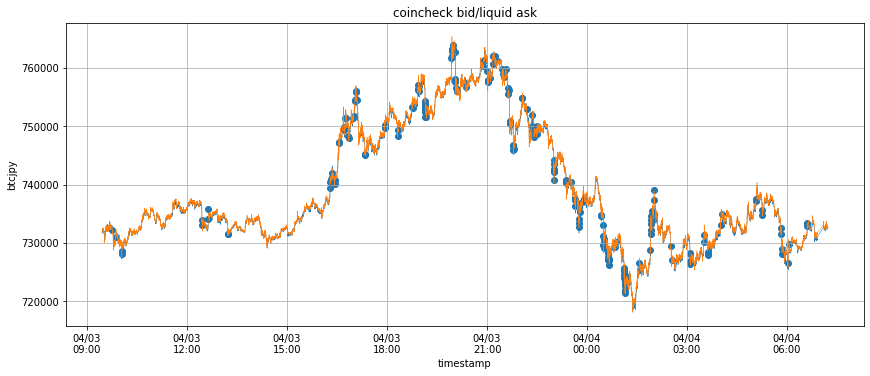

In [16]:
fig1

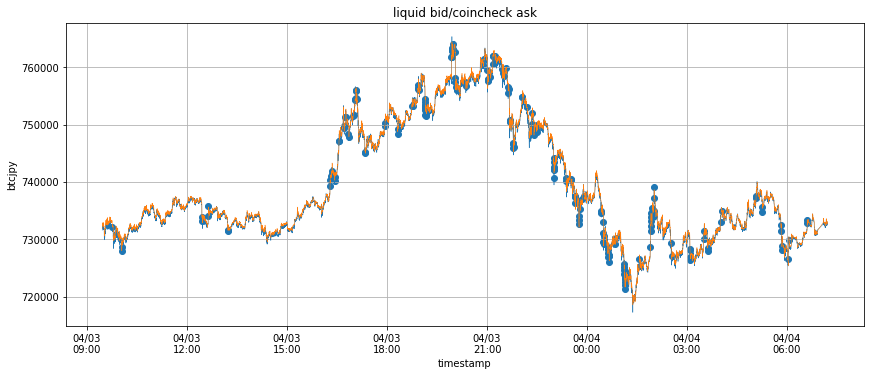

In [17]:
fig2